# USA Housing Data Analysis
## Marshall Ferguson - 2/2022

In [1]:
# Imports

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [2]:
# Import data

df_full = pd.read_csv('data\housing.csv')

df_full.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [3]:
df_full.shape

(384977, 22)

In [4]:
df_full.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [5]:
df_full.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


Which columns will be of interest for our analysis?

In [6]:
df_full.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [7]:
vars_of_interest = ['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
                    'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'lat', 'long', 'state']

df_trimmed = df_full.filter(vars_of_interest)

df_trimmed.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,39.5357,-119.805,ca


In [8]:
# Write trimmed DF to new CSV file

df_trimmed.to_csv('data\housing_trimmed.csv')

In [9]:
# Show contents of data directory to ensure CSV file was created

!dir "data/"

 Volume in drive C is Acer
 Volume Serial Number is E4EC-476E

 Directory of c:\Users\Marshall\Documents\projects\usa-housing-data-analysis\data

02/17/2022  02:12 PM    <DIR>          .
02/17/2022  02:12 PM    <DIR>          ..
02/14/2022  10:47 AM       558,438,401 housing.csv
02/18/2022  06:37 AM        29,488,791 housing_trimmed.csv
               2 File(s)    587,927,192 bytes
               2 Dir(s)  347,530,874,880 bytes free


Let's explore this data to see if there are any outliers. To do this, we will first visualize the data with some histograms.

In [10]:
# sns.histplot(df_trimmed, x="price")

In [11]:
# sns.histplot(df_trimmed.price)

Both of the above cells took longer than 10 minutes and needed to be interrupted. Let's try some box plots instead.

<AxesSubplot:ylabel='price'>

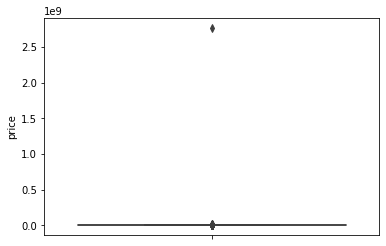

In [12]:
sns.boxplot(y=df_trimmed['price'])

It looks like we have an extreme outlier in the price column of our DF. Let's remove outliers from the DF, then try to make the box plots afterwards.

In [13]:
# Check shape of df_trimmed so we can see the # of rows before we remove outliers

df_trimmed.shape

(384977, 15)

In [14]:
# Use numpy to find the interquartile range

q3 = np.quantile(df_trimmed['price'], 0.75)
q1 = np.quantile(df_trimmed['price'], 0.25)
iqr = q3 - q1

iqr

590.0

In [17]:
# Create a list of values in df_trimmed.price that fall within our desired range

lower_range = q1 - (1.5*iqr)
upper_range = q3 + (1.5*iqr)

list_no_outliers = [x for x in df_trimmed['price'] if (
    (x > lower_range) & (x < upper_range))]

In [18]:
# Convert list_no_outliers to a series

price_no_outliers = pd.Series(list_no_outliers)

type(price_no_outliers)

pandas.core.series.Series

In [20]:
price_no_outliers.describe()

count    366146.000000
mean       1088.321588
std         400.013347
min           0.000000
25%         800.000000
50%        1009.000000
75%        1330.000000
max        2279.000000
dtype: float64

<AxesSubplot:>

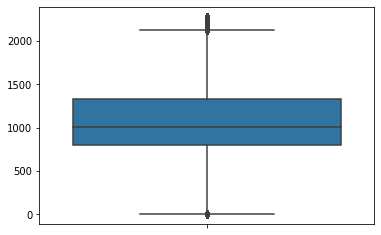

In [52]:
# Use seaborn to create a boxplot of price_no_outliers

sns.boxplot(y = price_no_outliers)

In [53]:
# Find amount of rows in price_no_outliers (we want a new df with this many rows)

price_no_outliers.shape

(366146,)

In [59]:
# Create a mask to filter out outliers, then check shape of new df to ensure it matches amount from above cell

outlier_mask = (df_trimmed.price > lower_range) & (df_trimmed.price < upper_range)

df_no_outliers = df_trimmed[outlier_mask]

df_no_outliers.shape

(366146, 15)

<AxesSubplot:xlabel='price', ylabel='Count'>

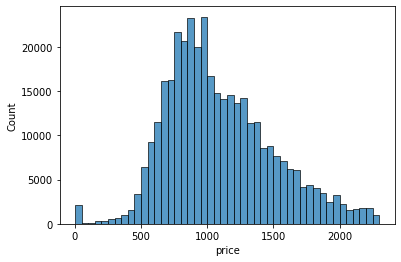

In [61]:
sns.histplot(df_no_outliers.price, binwidth=50)